# 문제정의
 
2차원 평면 상 n개의 점이 입력으로 주어질 때, 거리가 가장 가까운 한 쌍의 점을 찾는 문제이다.

# 알고리즘 설명
두 점 간의 모든 가능한 조합을 확인하고 최소 거리를 찾는 알고리즘이다. 하지만 큰 규모의 점 집합은 비효율적이다.

# 손으로 푼 예제 이미지 사진
![5.9손으로 푼 예제.png](<attachment:5.9손으로 푼 예제.png>)
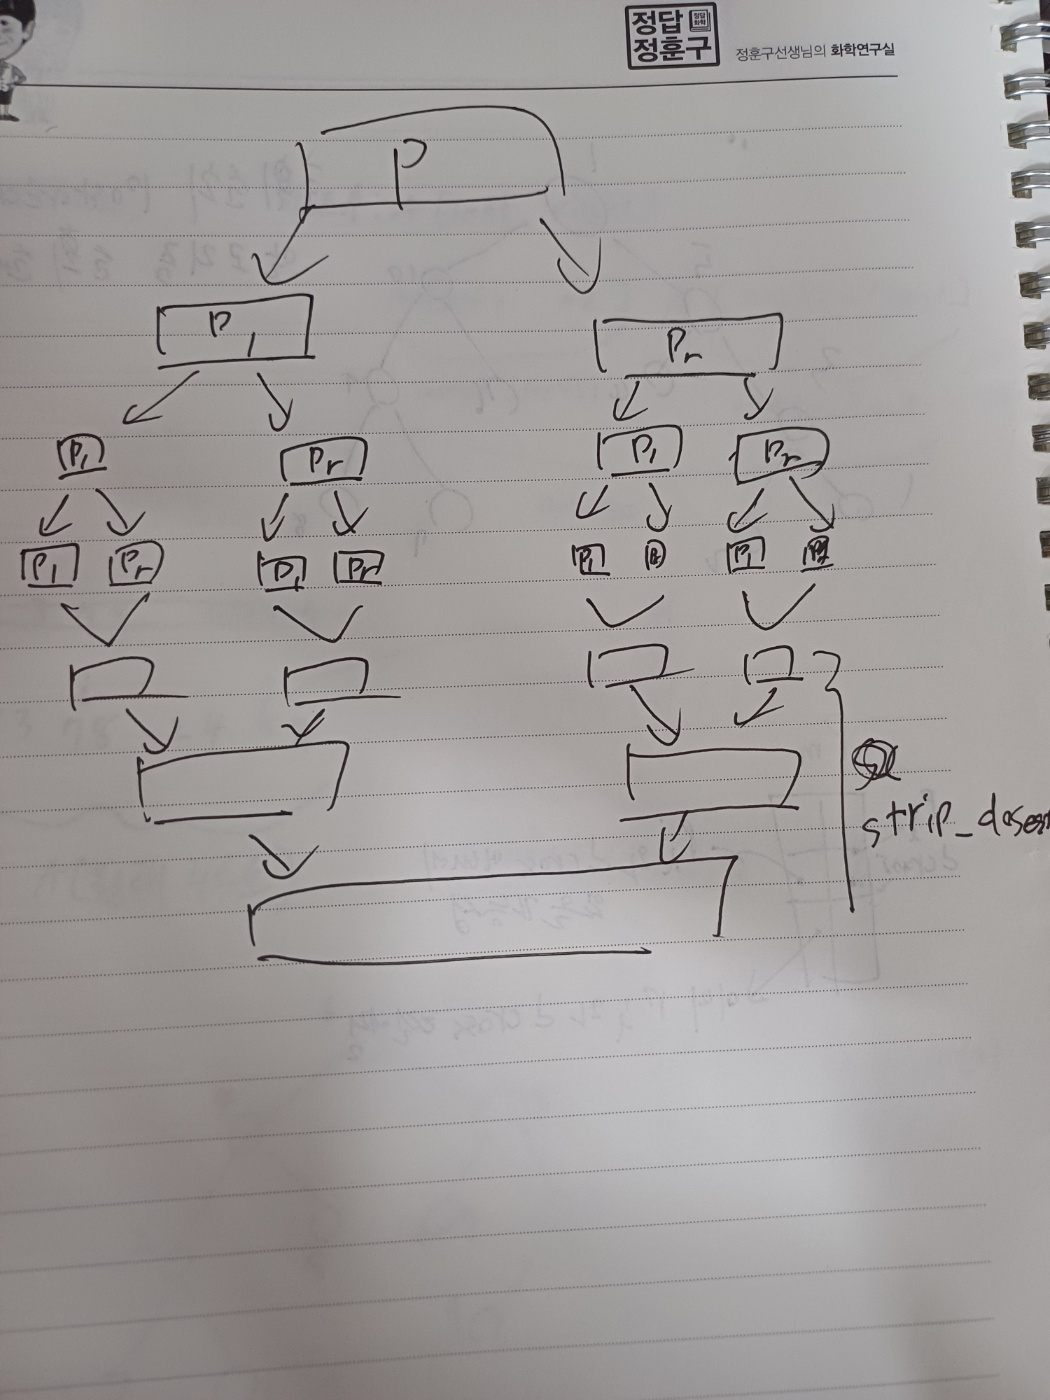

# 코드 개요
입력 : 무작위로 선택된 점 들
출력 : 각 점들의 거리가 가장 가까운 거리 출력
함수 내용 : 

closest_pair_dist(P, n)
P와 리스트의 길이 n을 입력으로 받아서, 이 점들 중에서 가장 가까운 두 점 사이의 거리를 계산하는 함수


In [1]:
# 코드
def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
    ds = strip_closest(Pm, d)
    return ds

In [1]:
# 테스트 코드

import random

def generate_points(n, min_val, max_val):
    return [(random.randint(min_val, max_val), random.randint(min_val, max_val)) for _ in range(n)]

def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def closest_pair_brute_force(points):
    min_dist = float('inf')
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            min_dist = min(min_dist, distance(points[i], points[j]))
    return min_dist

def strip_closest(P, d):
    n = len(P)
    d_min = d
    P.sort(key=lambda point: point[1]) 

    for i in range(n):
        j = i + 1

        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij = distance(P[i], P[j])
            if dij < d_min:
                d_min = dij
            j += 1
    return d_min

def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair_brute_force(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
    ds = strip_closest(Pm, d)
    return min(d, ds)

num_points = 10
min_val = 0
max_val = 100
points = generate_points(num_points, min_val, max_val)

print("Generated Points:")
for point in points:
    print(point)

closest_pair_distance = closest_pair_dist(points, len(points))

print("\nClosest Pair Distance:", closest_pair_distance)


Generated Points:
(89, 2)
(98, 50)
(58, 58)
(15, 78)
(56, 22)
(18, 12)
(93, 91)
(87, 9)
(10, 22)
(67, 34)

Closest Pair Distance: 12.806248474865697


# 수행 결과
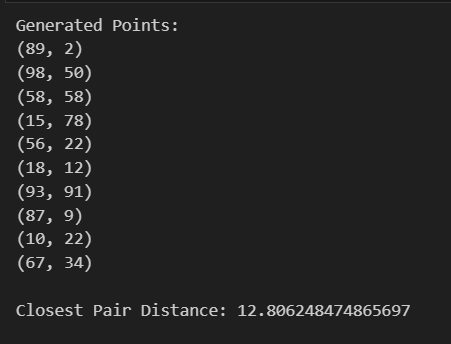


# 복잡도 분석
O(nlog2n)

# 협력 내용
홍서준 : 3, 4, 5  
최민호 : 6, 7  
권재훈 : 8, 9  
이재선 : 10, 12, 13 